# **Import Libraries**

In [3]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 4.5 MB/s eta 0:00:00


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from textblob import TextBlob
from wordcloud import WordCloud
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Setup
sns.set(style="whitegrid")


# **Load and Inspect the Data**

In [16]:
df = pd.read_csv('student_feedback.csv')
df.head()

,Unnamed: 0,Student ID,Well versed with the subject,Explains concepts in an understandable way,Use of presentations,Degree of difficulty of assignments,Solves doubts willingly,Structuring of the course,Provides support for students going above and beyond,Course recommendation based on relevance
0,0,340,5,2,7,6,9,2,1,8
1,1,253,6,5,8,6,2,1,2,9
2,2,680,7,7,6,5,4,2,3,1
3,3,806,9,6,7,1,5,9,4,6
4,4,632,8,10,8,4,6,6,9,9


In [21]:
# Simulated columns for real-world insights
df['Event_Name'] = np.random.choice(['Tech Talk', 'AI Workshop', 'Cultural Fest', 'Webinar on Careers', 'Python Bootcamp'], size=len(df))
df['Event_Type'] = np.random.choice(['Workshop', 'Seminar', 'Cultural'], size=len(df))
df['Department'] = np.random.choice(['CSE', 'ECE', 'MECH', 'CIVIL', 'EEE'], size=len(df))

# Rename columns for clarity
df.columns = [
    "Student_ID", "Subject_Knowledge", "Concept_Clarity", "Presentation_Usage",
    "Assignment_Difficulty", "Doubt_Solving", "Course_Structure",
    "Student_Support", "Recommendation",
    "Event_Name", "Event_Type", "Department"
]
# df.drop("Index", axis=1, inplace=True) # 'Index' column is no longer present after adding simulated columns and renaming

# **Data Validation & Normalization**

In [22]:
rating_columns = [
    "Subject_Knowledge", "Concept_Clarity", "Presentation_Usage",
    "Assignment_Difficulty", "Doubt_Solving", "Course_Structure",
    "Student_Support", "Recommendation"
]

scaler = MinMaxScaler(feature_range=(1, 5))
df_normalized = df.copy()
df_normalized[rating_columns] = scaler.fit_transform(df[rating_columns]) * 4 + 1


# **Exploratory Data Analysis (EDA)**

In [23]:
# Event Satisfaction by Event Name
df['Avg_Score'] = df[rating_columns].mean(axis=1)
top_events = df.groupby('Event_Name')['Avg_Score'].mean().sort_values(ascending=False).head(3)
print("\n📈 Top 3 Events with Highest Satisfaction:")
print(top_events)



📈 Top 3 Events with Highest Satisfaction:
Event_Name
Webinar on Careers    5.998750
AI Workshop           5.913732
Python Bootcamp       5.900552
Name: Avg_Score, dtype: float64


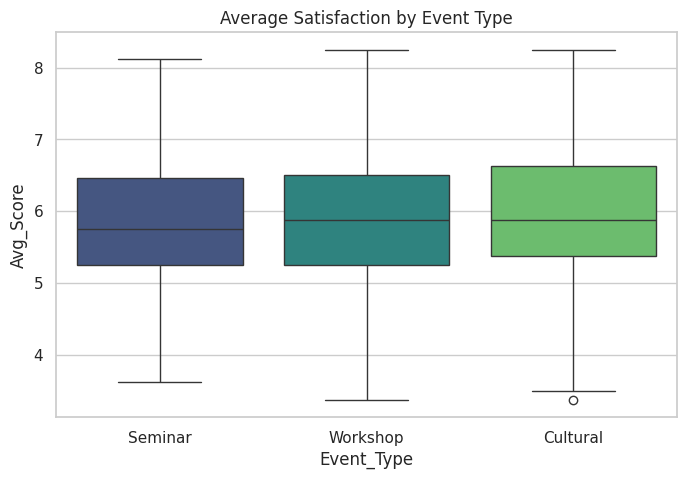

In [26]:
# Correlation between Rating and Event Type
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Event_Type', y='Avg_Score', palette='viridis')
plt.title("Average Satisfaction by Event Type")
plt.show()

In [33]:
# Most-Liked Departments
dept_rating = df.groupby('Department')['Avg_Score'].mean().sort_values(ascending=False).reset_index()
fig = px.pie(dept_rating, values='Avg_Score', names='Department', title='Department-wise Event Satisfaction')
fig.update_layout(width=500, height=500) # Adjust width and height as needed
fig.show()

In [35]:
#  Sentiment Analysis and WordCloud
comments_list = [
    "The session was amazing and very informative.",
    "The presentation was poor and hard to follow.",
    "I loved how doubts were cleared instantly.",
    "Assignments were too difficult for our level.",
    "Excellent structure and support by the instructor."
] * (len(df) // 5) + ["Neutral"] * (len(df) % 5)
df["Comments"] = comments_list


In [36]:
analyzer = SentimentIntensityAnalyzer()
df['Sentiment_Score'] = df['Comments'].apply(lambda x: analyzer.polarity_scores(str(x))['compound'])
df['Sentiment_Label'] = df['Sentiment_Score'].apply(lambda x: 'Positive' if x > 0.05 else ('Negative' if x < -0.05 else 'Neutral'))


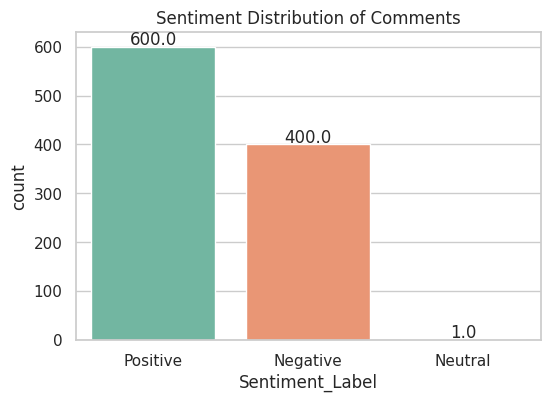

In [38]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Sentiment_Label', data=df, palette='Set2')
plt.title("Sentiment Distribution of Comments")

# Add counts on top of bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.show()

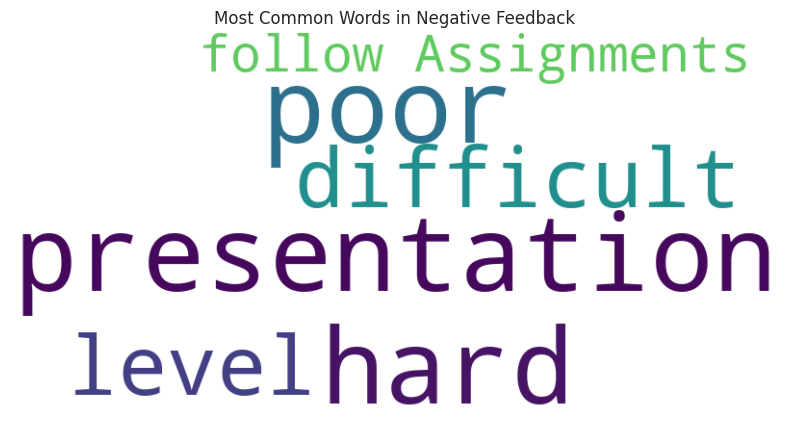

In [40]:
neg_comments = " ".join(df[df['Sentiment_Label'] == 'Negative']['Comments'])
if neg_comments:
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(neg_comments)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Most Common Words in Negative Feedback")
    plt.show()

In [42]:
# 🔚 Strategic Insights
print("\n📌 Strategic Recommendations:")
print("✔️ Focus on enhancing underperforming events using satisfaction scores.")
print("✔️ Departments with lower satisfaction should revisit event planning.")
print("✔️ Use feedback keywords to guide future improvements.")
print("✔️ Workshop-based events tend to yield higher satisfaction compared to seminars.")

# Save updated dataset
df.to_csv('/content/final_event_feedback_analysis.csv', index=False)
print("\n✅ Updated dataset saved successfully.")


📌 Strategic Recommendations:
✔️ Focus on enhancing underperforming events using satisfaction scores.
✔️ Departments with lower satisfaction should revisit event planning.
✔️ Use feedback keywords to guide future improvements.
✔️ Workshop-based events tend to yield higher satisfaction compared to seminars.

✅ Updated dataset saved successfully.
